# [1차] 프렌즈4블록

## 문제
같은 모양의 카카오프렌즈 블록이 2×2 형태로 4개가 붙어있을 경우 사라지면서 점수를 얻는 게임이 있음. 입력으로 블록의 첫 배치가 주어졌을 때, 지워지는 블록은 모두 몇 개인지 판단하는 프로그램을 제작.
<br><br>
input : m = 정수, n = 정수, board = 문자열 배열, output : 정수

#### <조건>
 - 입력으로 판의 높이 m, 폭 n과 판의 배치 정보 board가 들어옴
 - 2 ≦ n, m ≦ 30
 - board는 길이 n인 문자열 m개의 배열로 주어짐
 - 블록을 나타내는 문자는 대문자 A에서 Z가 사용
 
#### <예시>
input : m = 6, n = 6, board = ["TTTANT", "RRFACC", "RRRFCC", "TRRRAA", "TTMMMF", "TMMTTJ"]
<br><br>
result : 14
<br><br>
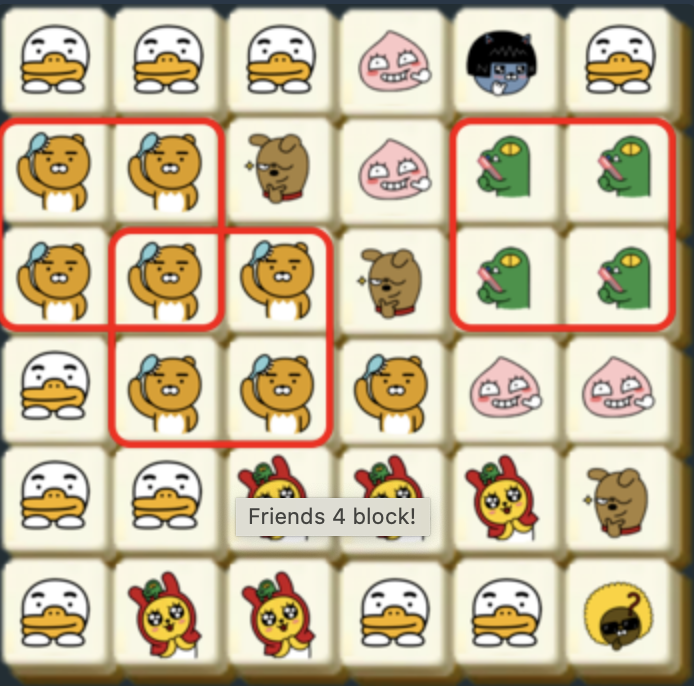
 - 만약 판이 위와 같이 주어질 경우, 라이언이 2×2로 배치된 7개 블록과 콘이 2×2로 배치된 4개 블록이 지워짐

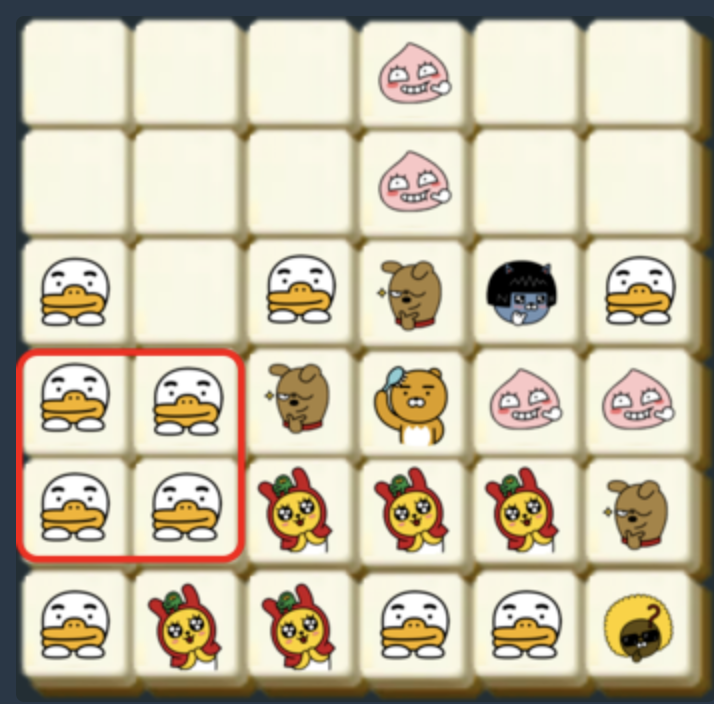
 - 만약 빈 공간을 채운 후에 다시 2×2 형태로 같은 모양의 블록이 모이면 다시 지워지고 떨어지고를 반복

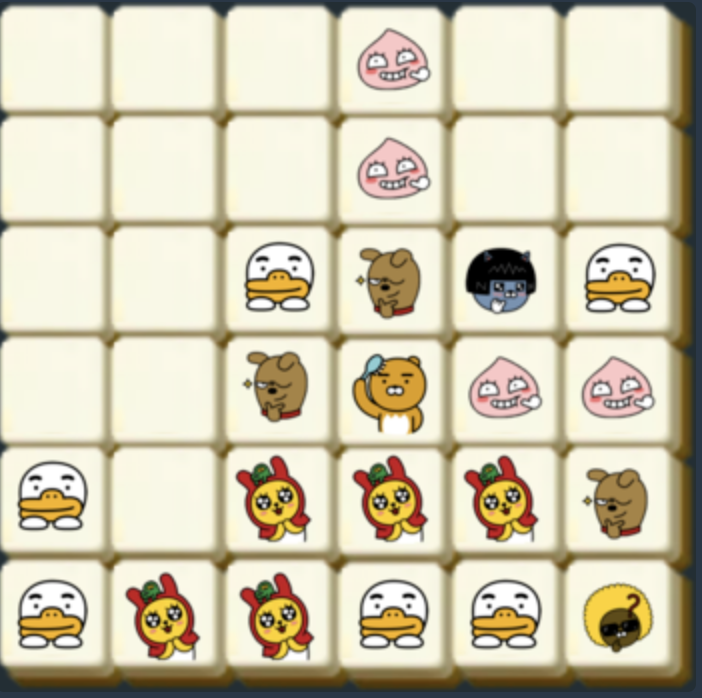
 - 모두 15개의 블록이 지워짐
 
https://programmers.co.kr/learn/courses/30/lessons/17679

## 풀이
 - board에 있는 문자열을 2차원 배열로 만들어줌
 - 블록이 2x2형태로 4개가 붙어있는 경우 인덱스의 값을 pair_list에 저장
 - pair_list를 set을 이용해서 중복되는 인덱스를 제거해주고 뒤에서 편리함을 위해 미리 내림차순으로 정렬
 - 4개가 붙어있는 경우를 제거하고 내리고를 더 이상 할 수 없을 때까지 반복해주는데 만약 pair_list가 없으면 더이상 반복할 필요가 없기에 answer를 return
 - 아닌 경우에는 터트릴 블록이 들어있는 pair_list의 길이만큼을 answer에 누적
 - pair_list에 있는 인덱스들을 열을 기준으로 pair_dict에 딕셔너리 형태로 저장
 - pair_dict을 돌면서 각 열에서 터지지 않은 블록의 인덱스를 remain에 저장
 - 터지지 않은 블록들을 밑에서부터 차례로 board에 넣어줌
 - 터질 블록들의 길이만큼 위에서부터 차례로 빈 공간이라는 표시인 '\_'를 넣어줌
 - 반복이 끝나면 터진 블록의 수를 누적한 answer를 return

In [1]:
def solution(m, n, board):
    answer = 0
    board = [list(i) for i in board]
    
    while 1:
        pair_list = []
        
        for i in range(m-1):
            for j in range(n-1):
                if board[i][j] != '_' and board[i][j] == board[i][j+1] and board[i][j] == board[i+1][j] and board[i+1][j] == board[i+1][j+1]:
                    pair_list.extend([[i,j],[i,j+1],[i+1,j],[i+1,j+1]])
        
        pair_list = sorted(list(set(map(tuple, pair_list))), key = lambda x: x[0], reverse=True)
        if not pair_list: return answer
        
        answer += len(pair_list)
        
        pair_dict = {}

        for i in pair_list:
            if i[1] in pair_dict:
                pair_dict[i[1]].append(i[0])
            else:
                pair_dict[i[1]] = [i[0]]
        
        for idx, value in pair_dict.items():
            remain = list(set(i for i in range(m)) - set(value))
            
            for i in range(len(remain)):
                board[m-i-1][idx] = board[remain[len(remain)-i-1]][idx]
                
            for i in range(len(value)):
                board[i][idx] = '_'     
            
    return answer

In [2]:
m = 6  # 가로
n = 6  # 세로
board = ["TTTANT", "RRFACC", "RRRFCC", "TRRRAA", "TTMMMF", "TMMTTJ"]

solution(m, n, board)

15